<a href="https://colab.research.google.com/github/LiquidPunk/Used_Car_Price_Prediction/blob/main/EDA%7CXGBRegressor%7Cused_cars_ph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("/content/used_car_data_ph.csv")

# Displaying the first few rows of the dataframe to understand its content and if it loaded correctly
print(df.head())
print(df.shape)

            Car_Name     Car_Brand  Year Transmission  Mileage    Price
0  Aston-Martin Db11  Aston-Martin  2018    Automatic    14000  9000000
1            Audi A4          Audi  2009    Automatic    48000   650000
2            Audi A4          Audi  2013    Automatic    12345  1095000
3            Audi A4          Audi  2016    Automatic    12000  1350000
4            Audi A4          Audi  2016    Automatic    12852  1450000
(5196, 6)


In [ ]:
df.dtypes

Car_Name        object
Car_Brand       object
Year             int64
Transmission    object
Mileage          int64
Price            int64
dtype: object

In [ ]:
# Checking for missing values
print(df.isnull().sum())

Car_Name        0
Car_Brand       0
Year            0
Transmission    0
Mileage         0
Price           0
dtype: int64


In [ ]:
# Lets take a look at the max and nlargest values in 'Mileage' as it seems that the outliers for this dataset seem to be in the upper bracket
print(df.loc[df['Mileage'].idxmax()])
df.nlargest(25, 'Mileage')

Car_Name        Cadillac Escalade
Car_Brand                Cadillac
Year                         2020
Transmission            Automatic
Mileage                   7700000
Price                     7700000
Name: 88, dtype: object


,Car_Name,Car_Brand,Year,Transmission,Mileage,Price
88,Cadillac Escalade,Cadillac,2020,Automatic,7700000,7700000
759,Ford Transit,Ford,2016,Automatic,2880000,2880000
577,Ford Mustang,Ford,2016,Automatic,2580000,2580000
3119,Subaru Brz,Subaru,2018,Automatic,1680000,1680000
3112,Subaru Brz,Subaru,2016,Automatic,1380000,1380000
825,Geely Coolray,Geely,2022,Automatic,999999,958000
4753,Toyota Vios,Toyota,2019,Automatic,999990,548000
2603,Mitsubishi Montero Sport,Mitsubishi,2016,Automatic,968000,968000
2599,Mitsubishi Montero Sport,Mitsubishi,2016,Automatic,958000,958000
1139,Honda Civic,Honda,2017,Automatic,898999,898000


In [ ]:
# Seems like we have some instances where the 'Milage' is the same as 'Price', aswell as some unrealistic values for mileage

# We'll deal with these by updating the df to only contain rows where 'Price' != 'Mileage' and removing the rows where 'Mileage' <= 400,000
df = df[df['Price'] != df['Mileage']]
df = df[df['Mileage'] <= 400000]

# Let's look at the new size of the dataframe
print(df.shape)

(5177, 6)


In [ ]:
# # Variable set to the count of occurrences for each 'Car_Name'
# car_name_counts = df['Car_Name'].value_counts()

# # Filter the DataFrame to keep only rows where unique 'Car_Name' appears at least 5 times
# df = df[df['Car_Name'].isin(car_name_counts[car_name_counts >= 20].index)]

# # Let's take a look at the updated DataFrame
# print(df.shape)

In [ ]:
# # Function for removing outliers using IQR method
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # Removing outliers from 'Mileage' and 'Price'
# df = remove_outliers(df, 'Mileage')
# df = remove_outliers(df, 'Price')

# # Let's look at the shape
# df.shape

# # Let's try just removing the upper bound of price (did the same with mileage, just made everything worst except the mileage histogram.)
# df = df[df['Price'] <= df['Price'].quantile(0.9)]

# df.shape

**Exploratory Data Analysis (EDA)**

In [ ]:
# Summary statistics
print(df.describe())

         Year   Mileage       Price
count 5177.00   5177.00     5177.00
mean  2017.35  42535.55  1095281.33
std      3.90  31435.73  1736216.99
min   1988.00      0.00    59800.00
25%   2016.00  19000.00   568000.00
50%   2018.00  38000.00   765000.00
75%   2020.00  60000.00  1080000.00
max   2024.00 300000.00 45900000.00


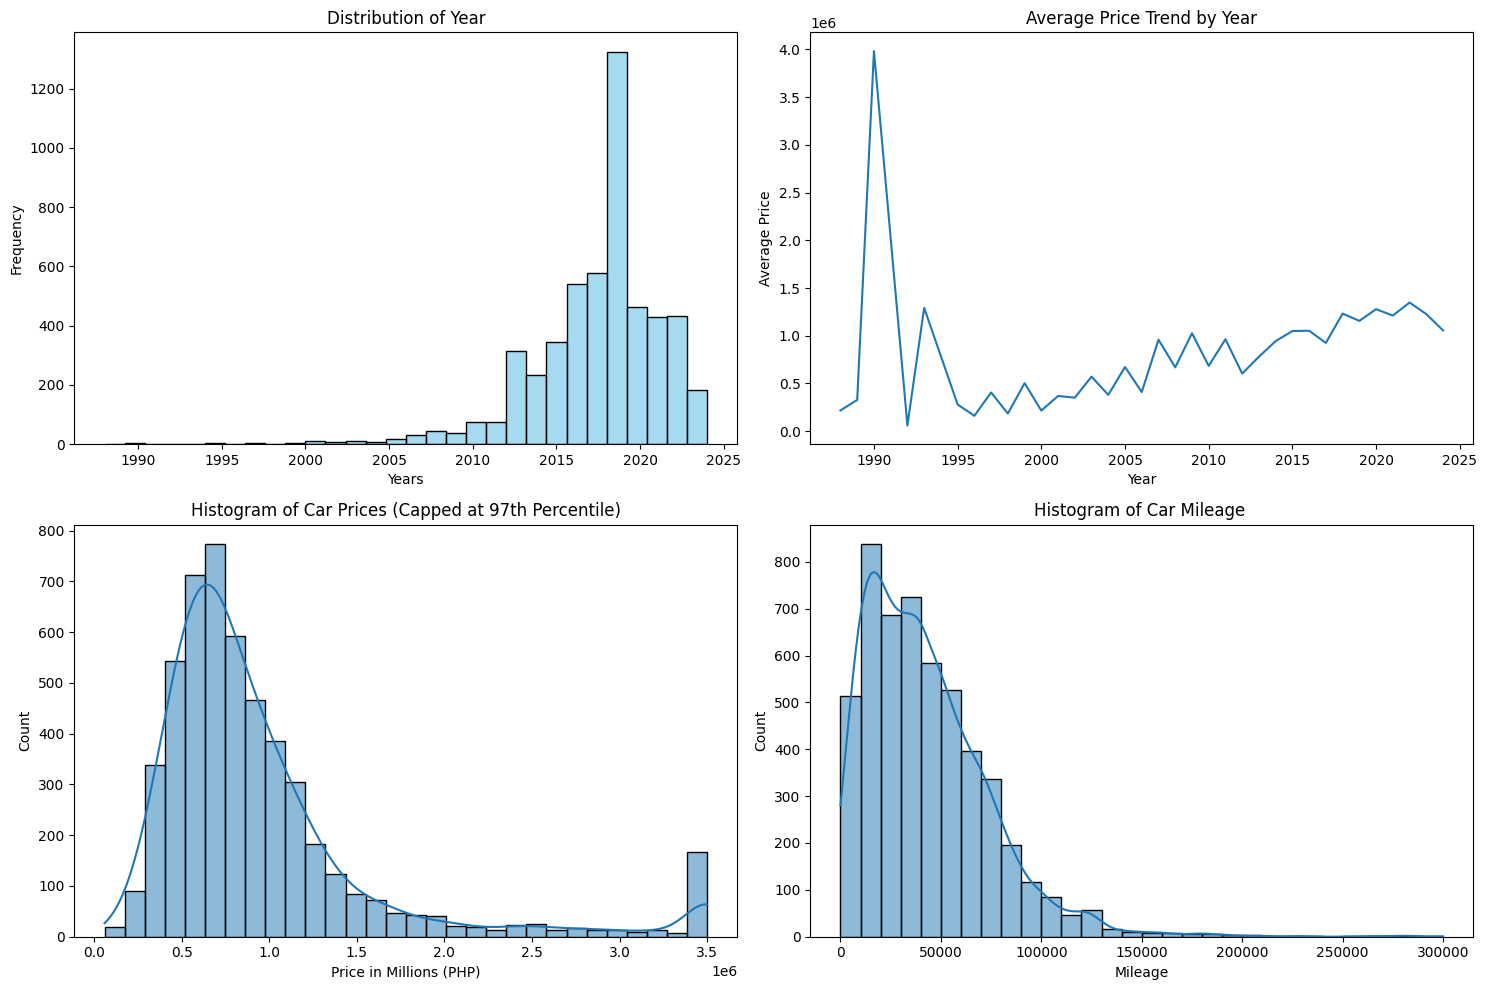

In [ ]:
# 2x2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plotting distribution of Year
sns.histplot(df['Year'], kde=False, bins=30, color='skyblue', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Year')
axes[0, 0].set_xlabel('Years')
axes[0, 0].set_ylabel('Frequency')

# Trend Analysis - Average Price by Year
trend_data = df.groupby('Year')['Price'].mean().reset_index()
sns.lineplot(x='Year', y='Price', data=trend_data, ax=axes[0, 1])
axes[0, 1].set_title('Average Price Trend by Year')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average Price')

# Creating a copy of the main df to use for some of the graphs and to not potencially change and muddy up the original df
df_capped = df.copy()

# Capping price at 97th percentile for increased readability
price_97th_percentile = df['Price'].quantile(0.97)
df_capped['Modified_Price'] = df['Price'].apply(lambda x: x if x <= price_97th_percentile else price_97th_percentile)

# Creating a histogram for price
sns.histplot(df_capped['Modified_Price'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Car Prices (Capped at 97th Percentile)')
axes[1, 0].set_xlabel('Price in Millions (PHP)')
axes[1, 0].set_ylabel('Count')

# Creating a histogram for mileage
sns.histplot(df['Mileage'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Car Mileage ')
axes[1, 1].set_xlabel('Mileage')
axes[1, 1].set_ylabel('Count')

# Spacing for the graphs
plt.tight_layout()

plt.show()


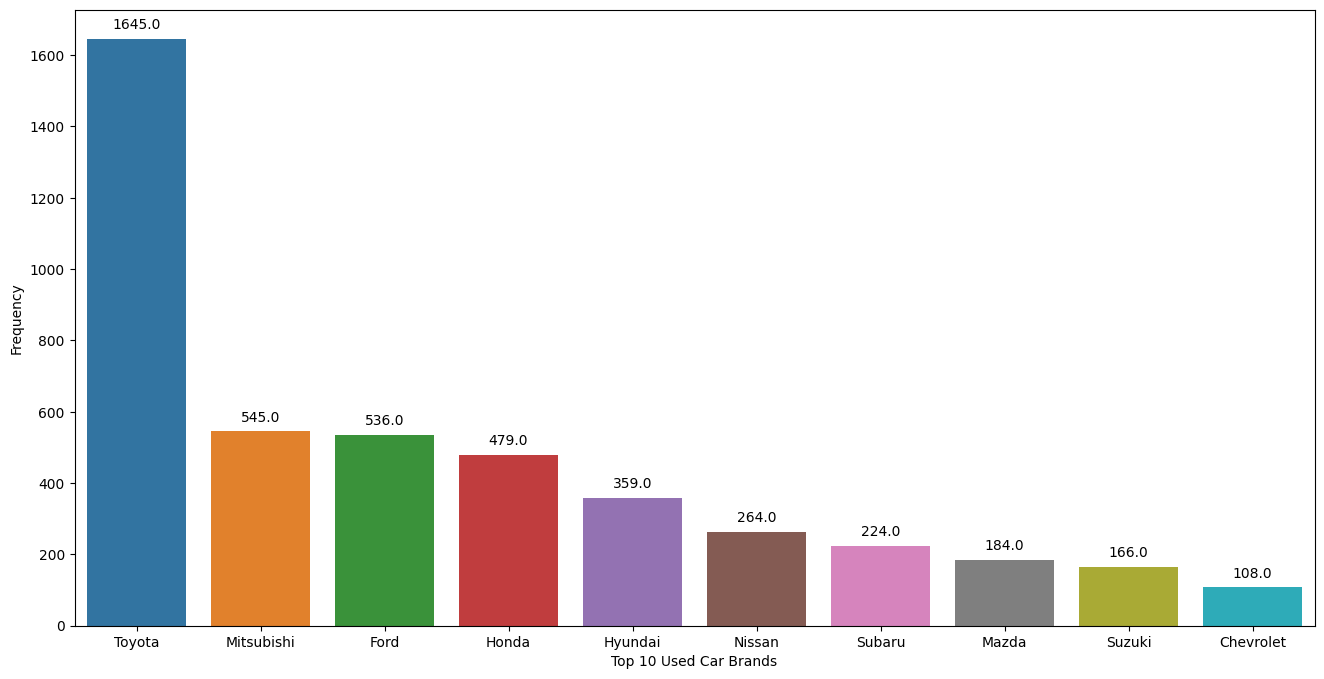

In [ ]:
# Creating variable for top 10 car brands in the dataframe
top10cars = (df
  .groupby("Car_Brand")
  .size()
  .reset_index(name='counts')
  .sort_values(by='counts', ascending=False)
  .head(10)
)

# Plotting most frequent Car Brands in the dataframe
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=top10cars['Car_Brand'], y=top10cars['counts'])
plt.xlabel('Top 10 Used Car Brands')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Adding values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


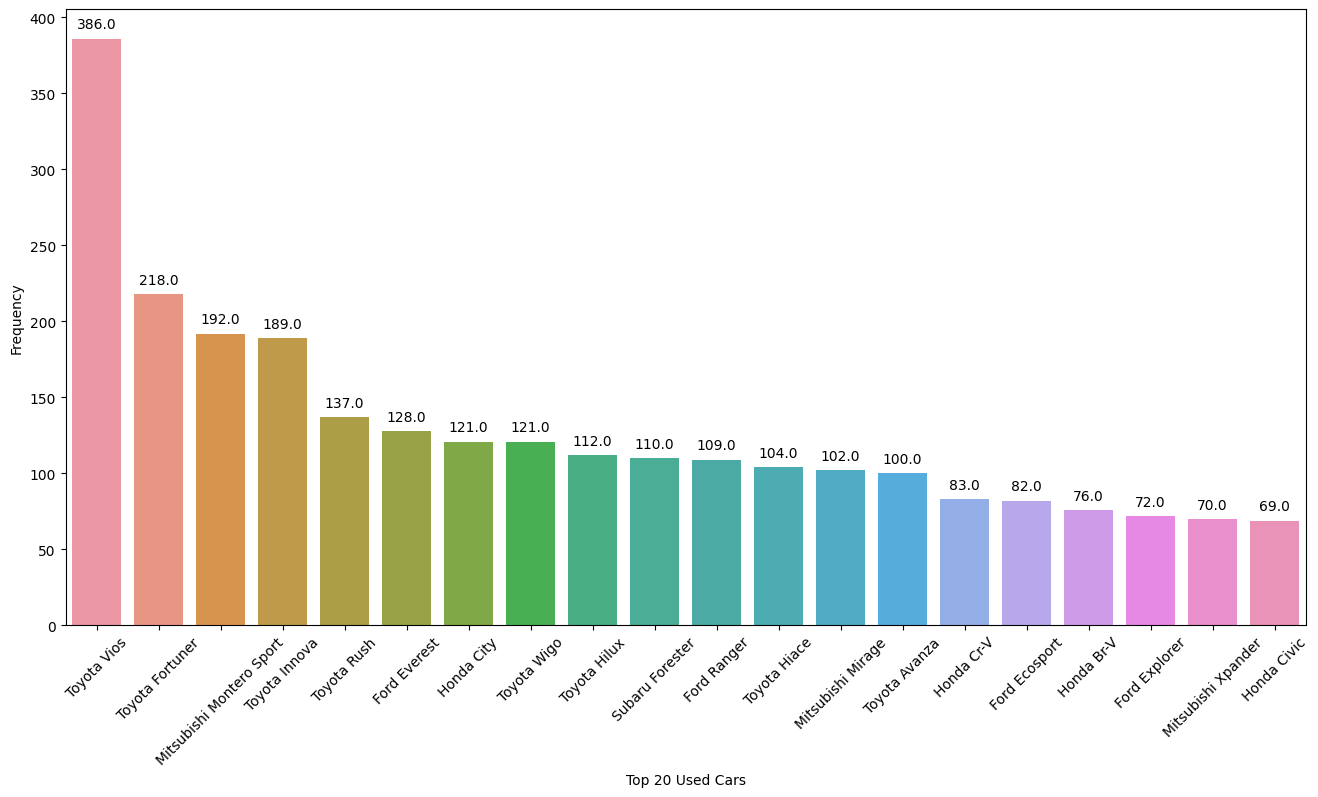

In [ ]:
# Creating variable for top 20 cars in the dataframe
top20cars = (df
  .groupby("Car_Name")
  .size()
  .reset_index(name='counts')
  .sort_values(by='counts', ascending=False)
  .head(20)
)

# Plotting most frequent Cars in the dataframe
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=top20cars['Car_Name'], y=top20cars['counts'])
plt.xlabel('Top 20 Used Cars')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adding values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


**PRICE PREDICTION | XGBRegressor**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder object
le = LabelEncoder()

# Using LabelEncoder to create numerical format of 'Car_Name' column
df['Car_Name_Label'] = le.fit_transform(df['Car_Name'])

# 'Car_Brand' is being label encoded for correlation analysis and is not used in training the model, as it appears to affect the model's accuracy
# The same effect was not observed when label encoding 'Car_Name' so we will just be using its label encoding
df['Car_Brand_Label'] = le.fit_transform(df['Car_Brand'])

# Dropping 'Car_Name' column
df_encoded = df.drop(['Car_Name', 'Transmission'], axis=1) # Transmission is being removed from the testing as I found most CVTs were mislabeled as ATs bringing its relevance to the dataset in question

# Converting other categorical variables into numeric format
df_encoded = pd.get_dummies(df_encoded, columns=['Car_Brand'])

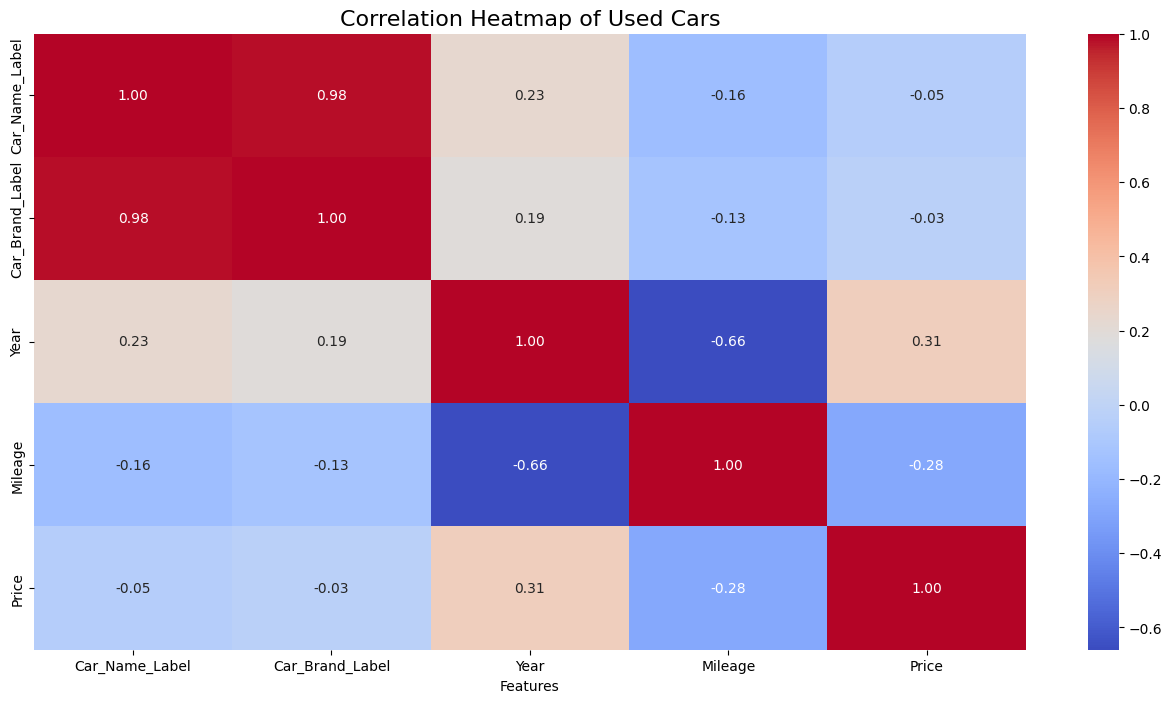

In [ ]:
plt.figure(figsize=(16, 8))

# Looking at the correlation of variables
corr_df = df_encoded[['Car_Name_Label', 'Car_Brand_Label', 'Year', 'Mileage', 'Price']].corr(method='spearman') #methods{‘pearson’, ‘kendall’, ‘spearman’}

heatmap_corr = sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
heatmap_corr.set_title("Correlation Heatmap of Used Cars", fontsize=16)
heatmap_corr.set_xlabel("Features")

plt.show()


In [ ]:
import plotly.express as px
# Scatter Plot for Mileage vs. Year
fig = px.scatter(df, x='Year', y='Mileage',
                 title='Scatter Plot of Mileage vs. Year',
                 labels={'Year': 'Year', 'Mileage': 'Mileage'})

fig.show()

In [ ]:
# Scatter Plot for Mileage vs. Year
fig = px.scatter(df, x='Year', y='Price',
                 title='Scatter Plot of Price vs. Year',
                 labels={'Year': 'Year', 'Price': 'Price (PHP)'})

fig.show()


In [ ]:
# looking at the features in the encoded dataframe
df_encoded.columns

Index(['Year', 'Mileage', 'Price', 'Car_Name_Label', 'Car_Brand_Label',
       'Car_Brand_Aston-Martin', 'Car_Brand_Audi', 'Car_Brand_BMW',
       'Car_Brand_Bentley', 'Car_Brand_Cadillac', 'Car_Brand_Changan',
       'Car_Brand_Chery', 'Car_Brand_Chevrolet', 'Car_Brand_Chrysler',
       'Car_Brand_Dodge', 'Car_Brand_Ferrari', 'Car_Brand_Fiat',
       'Car_Brand_Ford', 'Car_Brand_Foton', 'Car_Brand_Gac', 'Car_Brand_Geely',
       'Car_Brand_Gmc', 'Car_Brand_Greatwall', 'Car_Brand_Hino',
       'Car_Brand_Hitachi', 'Car_Brand_Honda', 'Car_Brand_Hummer',
       'Car_Brand_Hyundai', 'Car_Brand_Isuzu', 'Car_Brand_Jac',
       'Car_Brand_Jaguar', 'Car_Brand_Jeep', 'Car_Brand_Jmc', 'Car_Brand_Kia',
       'Car_Brand_Komatsu', 'Car_Brand_Lamborghini', 'Car_Brand_Land-Rover',
       'Car_Brand_Lexus', 'Car_Brand_Lotus', 'Car_Brand_Maserati',
       'Car_Brand_Maxus', 'Car_Brand_Mazda', 'Car_Brand_Mclaren',
       'Car_Brand_Mercedes-Benz', 'Car_Brand_Mg', 'Car_Brand_Mini-Cooper',
       'Car_B

In [ ]:
# Assigning X and y variables for the model
X = df_encoded.drop(df[['Price', 'Car_Brand_Label']], axis=1)
y = df_encoded['Price']

In [ ]:
# # Train test splits
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Random Forest Model initialization and fitting
# random_forest = RandomForestRegressor(n_estimators=200, random_state=0)
# random_forest.fit(X_train, y_train)

# # Predictions on test set
# y_pred = random_forest.predict(X_test)

# # Let's evaluate the model
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Absolute Error: {mae}")
# print(f"R-squared: {r2}")

In [ ]:
from xgboost import XGBRegressor

# Train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize XGBoost Regressor and fitting
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predictions on test set
y_pred = xgb_model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 267595.91486184846
R-squared: 0.7637148328219624


**Outliers Removed -**
Mean Absolute Error: 87482.04407524141
R-squared: 0.7981631783839228

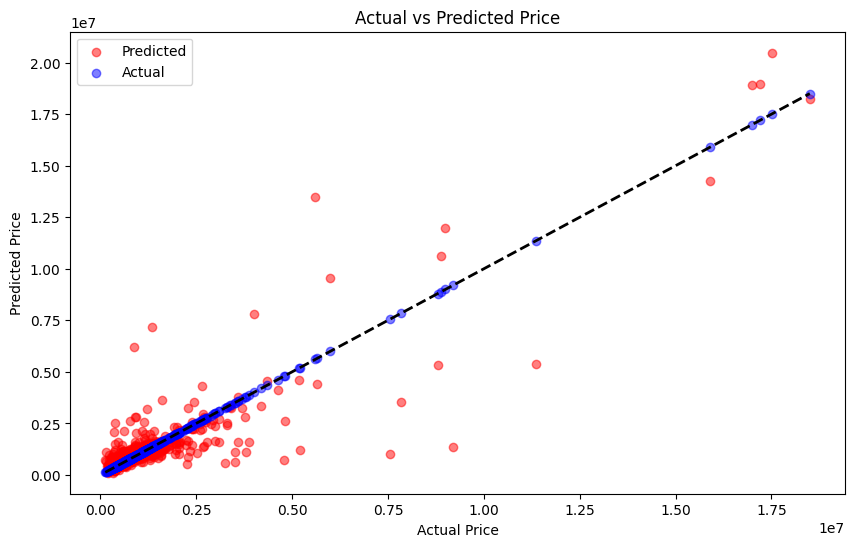

In [ ]:
# Scatter plot of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='red', label='Predicted')
plt.scatter(y_test, y_test, alpha=0.5, color='blue', label='Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend()

plt.show()


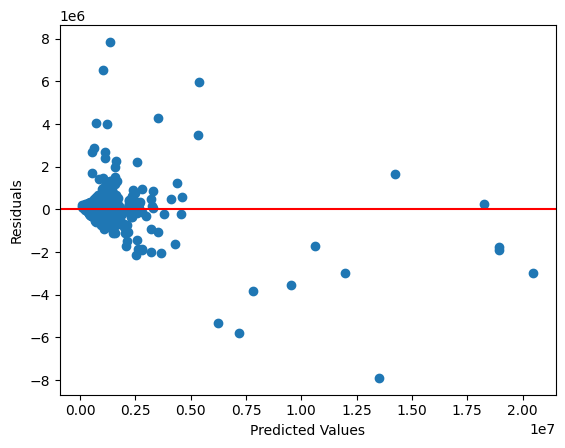

In [ ]:
# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.show()


In [ ]:
# Changing the display format for more readable
pd.options.display.float_format = '{:.2f}'.format

# Displaying more readable results and corresponding Car_Name_Label
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred, 'Difference': y_test - y_pred, 'Car_Name_Label': X_test['Car_Name_Label']})
pred_y_df[0:60]

,Actual Value,Predicted value,Difference,Car_Name_Label
400,998000,1161783.25,-163783.25,72
3921,1258000,1383774.62,-125774.62,313
1369,385000,514331.88,-129331.88,113
5034,368000,442789.81,-74789.81,331
3336,315000,270039.22,44960.78,288
2590,900000,959759.94,-59759.94,238
3960,1578000,1510081.50,67918.50,313
2602,968000,949811.38,18188.62,238
1179,518000,564490.75,-46490.75,105
42,1398000,1378832.00,19168.00,19


In [ ]:
label_value = (331) # Replace with Car_Name_Label you'd like to find

print(df.loc[df['Car_Name_Label'] == label_value, 'Car_Name'].iloc[0])

Toyota Wigo
